# Computing the fiber body of a zonotope

In [1]:
using Oscar
using IterTools
using LinearAlgebra

 -----    -----    -----      -      -----   
|     |  |     |  |     |    | |    |     |  
|     |  |        |         |   |   |     |  
|     |   -----   |        |     |  |-----   
|     |        |  |        |-----|  |   |    
|     |  |     |  |     |  |     |  |    |   
 -----    -----    -----   -     -  -     -  

...combining (and extending) ANTIC, GAP, Polymake and Singular
Version 0.8.2-DEV ... 
 ... which comes with absolutely no warranty whatsoever
Type: '?Oscar' for more information
(c) 2019-2022 by The Oscar Development Team


Given a list $L = \{z_1,\ldots ,z_s\}$ of points in $\mathbb{R}^N$, we can associate to it a zonotope, namely
$$
Z = \sum_{i = 1}^s [-z_i, z_i]
$$
where $[-z_i, z_i]$ is the segment between $-z_i$ and $z_i$.

In [2]:
# the following function computes the zonotope sum_i([-L[i],L[i]])

function zonotope(L)
    """
    Input:  list L
    Output: zonotope associated to L
    """
    sum(convex_hull([-ℓ; ℓ]) for ℓ in L)
end

zonotope (generic function with 1 method)

In [3]:
# for example: 

L1 = [[1 0 1], [1 1 0], [1 -1 0]]
L2 = [[1 2 -3 1],[1 0 -1 0],[0 2 2 -1],[3 -2 1 2],[0 0 0 1],[1 1 1 1]]

Z1 = zonotope(L1)
Z2 = zonotope(L2)

A polyhedron in ambient dimension 4

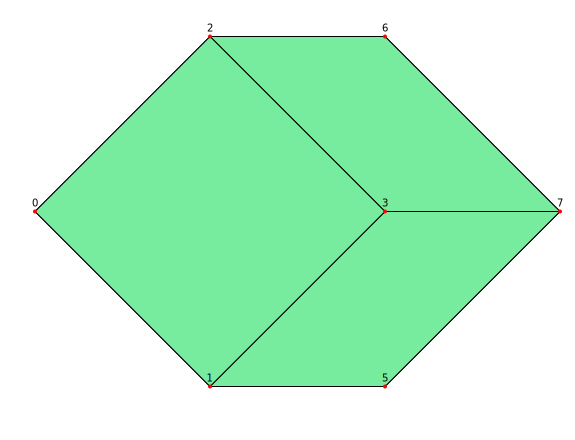

In [4]:
visualize(Z1)

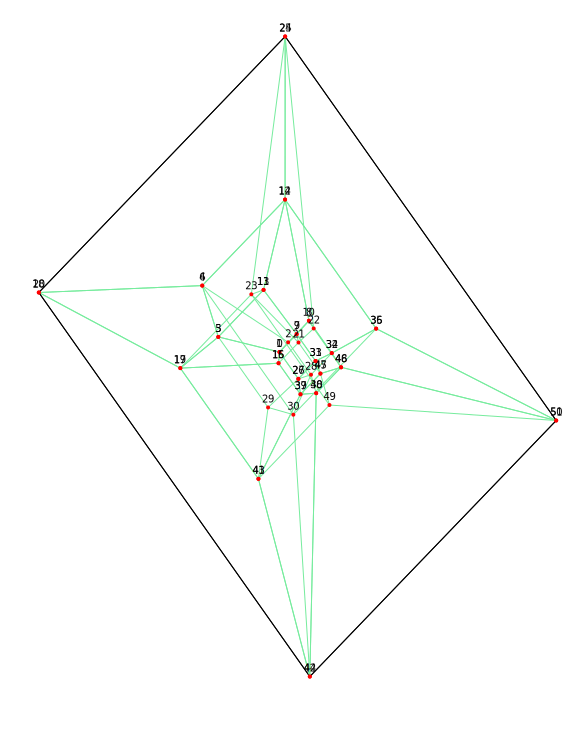

In [5]:
visualize(Z2)    # gives the Schlegel diagram of this four dimensional polytope

The fiber body of the zonotope $Z$ with respect to the projection $\pi : \mathbb{R}^N\to \mathbb{R}^n$ onto the first $n$ coordinates is the Minkowski sum
$$
(n+1)!\sum_{1\leq i_1<\cdots<i_{n+1}\leq s} \Big[-F_\pi\left(z_{i_1},\ldots, z_{i_{n+1}}\right), F_\pi(z_{i_1},\ldots, z_{i_{n+1}})\Big],
$$
where $F_\pi : (\mathbb{R}^n \times \mathbb{R}^{N-n})^{n+1}\to \mathbb{R}^{N-n}$ is defined by
$$
((x_1,y_1),\ldots ,(x_{n+1},y_{n+1})) \mapsto \frac{1}{(n+1)!}\sum_{i=1}^{n+1}(-1)^{n+1-i} (x_1\wedge\cdots\wedge \widehat{x_i} \wedge \cdots \wedge x_{n+1}) y_{i}.
$$

In [6]:
# the following function computes the fiber body of zonotope(L) 
# w.r.t. the projection onto the first n coordinates

function fiber_zonotope(L,n)
    """
    Input:  list L, associated to a zonotope Z
            integer n
    Output: list F_π, whose associated zonotope is the fiber zonotope of Z
            with respect to the projection onto the first n coordinates
    """
    N = length(L[1])
    s = length(L)
    X = [ℓ[1:n] for ℓ in L]
    Y = [ℓ[n+1:N] for ℓ in L]
    F_π = []
    for I in subsets(1:s,n+1)
        f = []
        for j in 1:n+1    # we compute now the summands of F_π
            II = copy(I)
            M = X[deleteat!(II,j)]
            MM = hcat(M...)
            dd = det(MM)
            g = 1/factorial(n+1)*(-1)^(n+1-j)*dd*hcat(Y[I[j]]...)
            push!(f,g)
        end
        F = factorial(n+1)*sum(f)    # this is F_π for the set of indices I
        append!(F_π, [F])
    end
    return F_π
end

fiber_zonotope (generic function with 1 method)

In [7]:
ΣZ1 = fiber_zonotope(L1,1)
ΣZ2 = fiber_zonotope(L2,1)

15-element Vector{Any}:
 [-2.0 2.0 -1.0]
 [2.0 2.0 -1.0]
 [-8.0 10.0 -1.0]
 [0.0 0.0 1.0]
 [-1.0 4.0 0.0]
 [2.0 2.0 -1.0]
 [-2.0 4.0 2.0]
 [0.0 0.0 1.0]
 [1.0 2.0 1.0]
 [-6.0 -6.0 3.0]
 [0.0 0.0 0.0]
 [-2.0 -2.0 1.0]
 [0.0 0.0 3.0]
 [5.0 2.0 1.0]
 [0.0 0.0 -1.0]

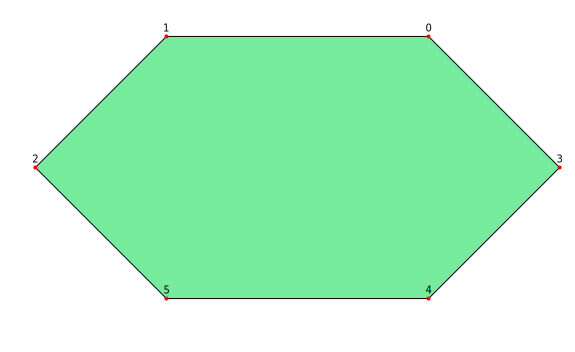

In [8]:
visualize(zonotope(ΣZ1))

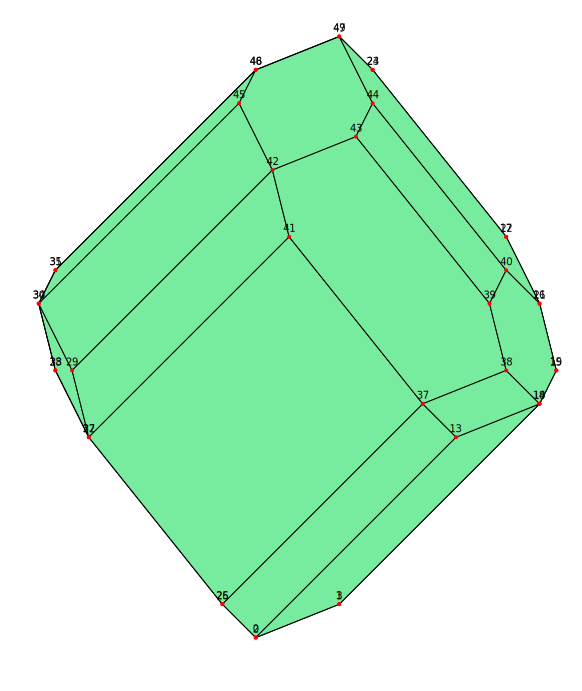

In [9]:
visualize(zonotope(ΣZ2))